In [14]:
!pip install librosa --user

In [49]:
!pip install pandas


In [50]:
!pip install tqdm

In [19]:
!pip install tensorflow --user

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [1]:
!pip install daal==2021.4.0

  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [50]:
!pip install numpy==1.22

In [23]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [2]:
import numpy as np

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os

In [3]:
np.__version__

'1.22.4'

In [4]:
filename = 'UrbanSound8K/dog_bark.wav'


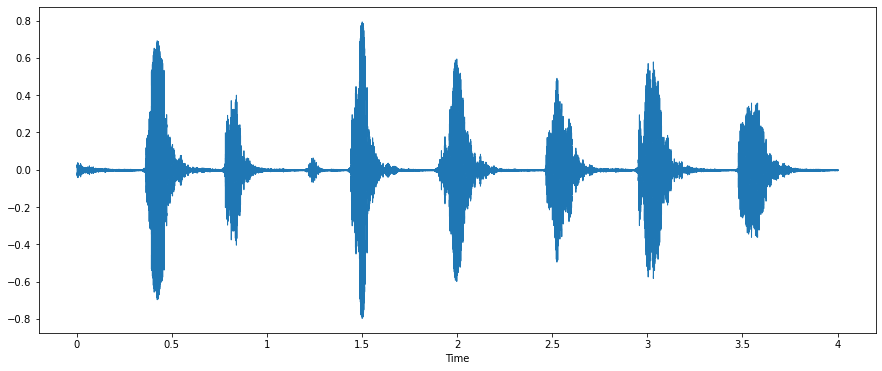

In [5]:
plt.figure(figsize=(15,6))
librosa_data, sample_rate = librosa.load(filename)
librosa.display.waveshow(librosa_data, sr=sample_rate)
ipd.Audio(filename)

In [6]:
print(librosa_data.shape)
librosa_data

(88200,)


array([0.00856121, 0.02041664, 0.0270719 , ..., 0.00203417, 0.00166276,
       0.00083364], dtype=float32)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav

wav_sample_rate, wav_data = wav.read(filename)
wav_data


array([[-380,  941],
       [ 299, 1475],
       [-266, 1036],
       ...,
       [-316,  433],
       [-318,  443],
       [-324,  436]], dtype=int16)

In [9]:
wav_sample_rate

11025

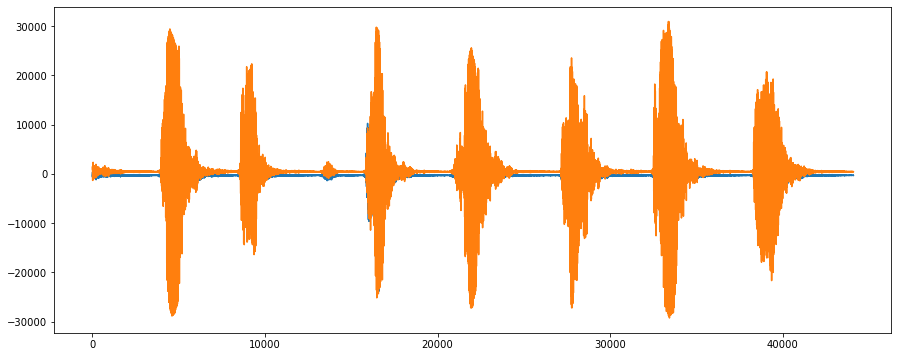

In [10]:
plt.figure(figsize=(15,6))
plt.plot(wav_data)

In [11]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [12]:
name = metadata.index[metadata['slice_file_name']=='34050-7-5-0.wav']
name

Int64Index([6133], dtype='int64')

In [13]:
metadata.iloc[6133]

slice_file_name    34050-7-5-0.wav
fsID                         34050
start                    24.457791
end                      26.658146
salience                         2
fold                            10
classID                          7
class                   jackhammer
Name: 6133, dtype: object

In [14]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [15]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Features extraction

In [16]:
mfccs = librosa.feature.mfcc(y=librosa_data, sr=sample_rate, n_mfcc=40)  # mfcc--> Mel-Feature Cepstrum Coefficients
mfccs.shape

(40, 173)

In [17]:
mfccs

array([[-3.0465457e+02, -3.0076831e+02, -3.2697015e+02, ...,
        -4.8570035e+02, -4.9850476e+02, -4.9910956e+02],
       [ 9.6802315e+01,  9.5446594e+01,  8.7721756e+01, ...,
         2.8050846e+01,  1.6862579e+01,  1.8292789e+01],
       [-4.4262650e+01, -5.3070976e+01, -4.9587814e+01, ...,
         7.9917254e+00,  9.6012268e+00,  1.5320711e+01],
       ...,
       [-3.5441158e+00, -5.0144629e+00, -6.2928600e+00, ...,
         4.9601898e+00,  2.9500425e-01, -3.8347876e-01],
       [-2.0438571e+00, -4.3356323e+00, -8.1547928e+00, ...,
         3.6727118e+00, -1.4211738e-01, -4.7214252e-01],
       [ 2.0813515e+00,  1.0038717e+00, -9.0400684e-01, ...,
         4.3910780e+00,  5.8815897e-01,  2.0350271e-01]], dtype=float32)

In [18]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [19]:
def feature_extractor(filename):
    audio_data, sample_rate = librosa.load(filename)
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [20]:
audio_dataset_path = 'UrbanSound8K/audio/'

In [21]:
from tqdm import tqdm

extracted_features = []
for idx, row in tqdm(metadata.iterrows()):
    filename = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row['fold'])+'/'+str(row['slice_file_name']))
    class_label = row['class']
    data = feature_extractor(filename)
    extracted_features.append([data,class_label])

3550it [00:56, 61.27it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8321it [02:14, 72.67it/s]C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:20, 62.01it/s]


In [24]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
extracted_features_df

,features,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043558, 42.78452, 11...",children_playing
4,"[-439.63867, 103.86223, -42.658787, 50.690277,...",children_playing
...,...,...
8727,"[-391.3721, 125.36239, -40.634056, 25.899754, ...",car_horn
8728,"[-339.42715, 76.409096, -35.30988, 41.984035, ...",car_horn
8729,"[-297.31534, 102.09026, -36.75108, 26.816486, ...",car_horn
8730,"[-336.92386, 115.3139, -44.8471, 24.968985, -9...",car_horn


In [32]:
X = np.array(extracted_features_df['features'].tolist())
y= np.array(extracted_features_df['class'].tolist())

In [33]:
X.shape

(8732, 40)

In [34]:
y.shape

(8732,)

In [35]:
#y = pd.get_dummies(y)

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



In [67]:
a = labelencoder.fit_transform(y)
a = pd.DataFrame(a)
a[0].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4], dtype=int64)

In [68]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [71]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
total_labels = y.shape[1]

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 321)

In [74]:
X_train_tuner,X_val,y_train_tuner,y_val = train_test_split(X_train,y_train,test_size=0.2, random_state = 321)

In [75]:
X_train_tuner.shape

(5588, 40)

In [76]:
y_train_tuner.shape

(5588, 10)

In [77]:
y_test.shape

(1747, 10)

In [78]:
X_val.shape

(1397, 40)

In [79]:
import tensorflow as tf


In [37]:
!pip install -U keras-tuner

In [80]:
from tensorflow.keras import layers

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import keras_tuner
from keras_tuner import RandomSearch

In [82]:
hp = keras_tuner.HyperParameters()


In [83]:
def build_model(hp):
    model = Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 1, 10)):
        model.add(layers.Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
        if hp.Boolean(f'dropout_{i}'):
            model.add(layers.Dropout(0.25))
            
    model.add(layers.Dense(units=total_labels, activation='softmax'))
              
    learning_rate = hp.Float('ls', min_value=0.00001, max_value=0.001, sampling='log')
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
              
    return model 

In [84]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    directory="F:",
    project_name="tuned_ANN_speech"
    )

In [85]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_0 (Boolean)
{'default': False, 'conditions': []}
ls (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [86]:
tuner.search(X_train_tuner, y_train_tuner, epochs=50, validation_data=(X_val, y_val), verbose=1)

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.9105225205421448

Best val_accuracy So Far: 0.9105225205421448
Total elapsed time: 00h 05m 43s
INFO:tensorflow:Oracle triggered exit


In [87]:
tuner.results_summary()

Results summary
Results in F:tuned_ANN_speech
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
num_layers: 9
units_0: 416
dropout_0: False
ls: 0.0007282286591355298
units_1: 352
dropout_1: False
units_2: 448
dropout_2: True
units_3: 128
dropout_3: False
units_4: 416
dropout_4: False
units_5: 352
dropout_5: True
units_6: 512
dropout_6: True
units_7: 32
dropout_7: False
units_8: 32
dropout_8: False
Score: 0.9105225205421448

Trial 00 summary
Hyperparameters:
num_layers: 1
units_0: 512
dropout_0: False
ls: 0.0006851781534735413
Score: 0.9040801525115967

Trial 06 summary
Hyperparameters:
num_layers: 7
units_0: 256
dropout_0: True
ls: 0.00028073927945585647
units_1: 448
dropout_1: True
units_2: 384
dropout_2: True
units_3: 288
dropout_3: False
units_4: 128
dropout_4: True
units_5: 32
dropout_5: False
units_6: 32
dropout_6: False
Score: 0.8718683123588562

Trial 01 summary
Hyperparameters:
num_layers: 5
units_0: 192
dropout_0: True
ls

In [88]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

In [91]:
model.build(input_shape=(None, 40))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_10 (Dense)            (None, 416)               17056     
                                                                 
 dense_11 (Dense)            (None, 352)               146784    
                                                                 
 dense_12 (Dense)            (None, 448)               158144    
                                                                 
 dropout_3 (Dropout)         (None, 448)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               57472     
                                                                 
 dense_14 (Dense)            (None, 416)              

In [92]:
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
110/110 [==============================] - 1s 7ms/step - loss: 2.1450 - accuracy: 0.2037 - val_loss: 1.8277 - val_accuracy: 0.3406
Epoch 2/100
110/110 [==============================] - 1s 5ms/step - loss: 1.6876 - accuracy: 0.3994 - val_loss: 1.4717 - val_accuracy: 0.4940
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 1.3722 - accuracy: 0.5173 - val_loss: 1.1494 - val_accuracy: 0.6199
Epoch 4/100
110/110 [==============================] - 1s 5ms/step - loss: 1.2072 - accuracy: 0.5926 - val_loss: 1.1135 - val_accuracy: 0.6331
Epoch 5/100
110/110 [==============================] - 1s 5ms/step - loss: 1.0695 - accuracy: 0.6399 - val_loss: 0.9184 - val_accuracy: 0.7041
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.9379 - accuracy: 0.6876 - val_loss: 0.8190 - val_accuracy: 0.7264
Epoch 7/100
110/110 [==============================] - 1s 5ms/step - loss: 0.8258 - accuracy: 0.7210 - val_loss: 0.7704 - val_accuracy: 0.7499

Epoch 58/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0667 - accuracy: 0.9832 - val_loss: 0.3462 - val_accuracy: 0.9153
Epoch 59/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9888 - val_loss: 0.4065 - val_accuracy: 0.9176
Epoch 60/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.4184 - val_accuracy: 0.9204
Epoch 61/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.4041 - val_accuracy: 0.9222
Epoch 62/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9808 - val_loss: 0.4857 - val_accuracy: 0.9136
Epoch 63/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.4732 - val_accuracy: 0.9193
Epoch 64/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0676 - accuracy: 0.9807 - val_loss: 0.3945 - val_accuracy:

In [ ]:
# best epoch
# Epoch 94/100
# 110/110 [==================] - 1s 5ms/step - loss: 0.0183 - accuracy: 0.9930 - val_loss: 0.3895 - val_accuracy: 0.9393

In [93]:
model.save('ANN_hypertuned_model')

INFO:tensorflow:Assets written to: ANN_hypertuned_model\assets


In [94]:
test_accuracy = model.evaluate(X_test, y_test, verbose=1)

55/55 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.9296


In [119]:
"""model = Sequential()
model.add(layers.Flatten())

for i in range(0,7):
    model.add(layers.Dense(units= 280 + (i*10), activation='relu'))
    model.add(layers.Dropout(0.25))
    

model.add(layers.Dense(units=total_labels, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=6.023588532722681e-05), loss='categorical_crossentropy', metrics=['accuracy'])"""

In [120]:
'''model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test,y_test))'''

Epoch 1/100
219/219 [==============================] - 4s 10ms/step - loss: 4.2157 - accuracy: 0.1095 - val_loss: 2.2444 - val_accuracy: 0.1660
Epoch 2/100
219/219 [==============================] - 2s 7ms/step - loss: 2.7006 - accuracy: 0.1187 - val_loss: 2.2569 - val_accuracy: 0.1712
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 2.4766 - accuracy: 0.1228 - val_loss: 2.2588 - val_accuracy: 0.2026
Epoch 4/100
219/219 [==============================] - 2s 9ms/step - loss: 2.3803 - accuracy: 0.1293 - val_loss: 2.2552 - val_accuracy: 0.2364
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 2.3207 - accuracy: 0.1384 - val_loss: 2.2481 - val_accuracy: 0.2879
Epoch 6/100
219/219 [==============================] - 2s 9ms/step - loss: 2.2983 - accuracy: 0.1327 - val_loss: 2.2361 - val_accuracy: 0.2902
Epoch 7/100
219/219 [==============================] - 2s 10ms/step - loss: 2.2748 - accuracy: 0.1470 - val_loss: 2.2313 - val_accuracy: 0.31

Epoch 58/100
219/219 [==============================] - 2s 9ms/step - loss: 1.2576 - accuracy: 0.5721 - val_loss: 1.0574 - val_accuracy: 0.6806
Epoch 59/100
219/219 [==============================] - 2s 9ms/step - loss: 1.2454 - accuracy: 0.5727 - val_loss: 1.0422 - val_accuracy: 0.6760
Epoch 60/100
219/219 [==============================] - 2s 10ms/step - loss: 1.2494 - accuracy: 0.5745 - val_loss: 1.0267 - val_accuracy: 0.6817
Epoch 61/100
219/219 [==============================] - 2s 10ms/step - loss: 1.2233 - accuracy: 0.5864 - val_loss: 1.0191 - val_accuracy: 0.6777
Epoch 62/100
219/219 [==============================] - 2s 9ms/step - loss: 1.2149 - accuracy: 0.5883 - val_loss: 1.0124 - val_accuracy: 0.6829
Epoch 63/100
219/219 [==============================] - 2s 9ms/step - loss: 1.1982 - accuracy: 0.5947 - val_loss: 1.0015 - val_accuracy: 0.6898
Epoch 64/100
219/219 [==============================] - 2s 10ms/step - loss: 1.1884 - accuracy: 0.5951 - val_loss: 0.9851 - val_accura

In [127]:
filenames = 'UrbanSound8K/mixkit-laser-weapon-shot-1681.wav'
audio_data = feature_extractor(filenames)
audio_data = audio_data.reshape(1,-1)
predicted_label = np.argmax(model.predict(audio_data), axis=-1)
print(predicted_label)
predicted_class = labelencoder.inverse_transform(predicted_label)
predicted_class

1/1 [==============================] - 0s 16ms/step
[2]


array(['children_playing'], dtype='<U16')

In [ ]:
'''Trial 03 summary
Hyperparameters:
num_layers: 7
units: 352
dropout: False
ls: 6.023588532722681e-05
Score: 0.9126700162887573'''

In [85]:
'''model = Sequential([
    
    Dense(units=100, activation= 'relu', input_shape = (40,)),
    Dropout(0.5),
    Dense(units=200, activation= 'relu'),
    Dropout(0.5),
    Dense(units=100, activation= 'relu'),
    Dropout(0.5),
    Dense(units=total_labels, activation= 'softmax')
])'''

In [86]:
'''model.summary()'''

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [87]:
'''model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')'''

In [12]:
'''from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime'''

In [118]:

'''
num_epochs = 100
num_batch = 32

checkpoint = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch, epochs=num_epochs, validation_data=(X_test,y_test), callbacks=[checkpoint])

duration = datetime.now() - start
print("Total Training Time: ",duration)
'''

Epoch 1/100
207/219 [===========================>..] - ETA: 0s - loss: 0.9057 - accuracy: 0.6999
Epoch 1: val_loss improved from inf to 0.64888, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.9017 - accuracy: 0.7018 - val_loss: 0.6489 - val_accuracy: 0.7922
Epoch 2/100
205/219 [===========================>..] - ETA: 0s - loss: 0.9003 - accuracy: 0.7055
Epoch 2: val_loss did not improve from 0.64888
219/219 [==============================] - 1s 3ms/step - loss: 0.8997 - accuracy: 0.7055 - val_loss: 0.6508 - val_accuracy: 0.8002
Epoch 3/100
201/219 [==========================>...] - ETA: 0s - loss: 0.8879 - accuracy: 0.7054
Epoch 3: val_loss did not improve from 0.64888
219/219 [==============================] - 1s 3ms/step - loss: 0.8956 - accuracy: 0.7038 - val_loss: 0.6546 - val_accuracy: 0.7951
Epoch 4/100
214/219 [============================>.] - ETA: 0s - loss: 0.8821 - accuracy: 0.7021
Epoch 4: val_loss impr

Epoch 30/100
212/219 [============================>.] - ETA: 0s - loss: 0.8515 - accuracy: 0.7167
Epoch 30: val_loss did not improve from 0.62905
219/219 [==============================] - 1s 3ms/step - loss: 0.8532 - accuracy: 0.7168 - val_loss: 0.6404 - val_accuracy: 0.7934
Epoch 31/100
213/219 [============================>.] - ETA: 0s - loss: 0.8700 - accuracy: 0.7089
Epoch 31: val_loss improved from 0.62905 to 0.62504, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8741 - accuracy: 0.7078 - val_loss: 0.6250 - val_accuracy: 0.7985
Epoch 32/100
205/219 [===========================>..] - ETA: 0s - loss: 0.8530 - accuracy: 0.7159
Epoch 32: val_loss did not improve from 0.62504
219/219 [==============================] - 1s 3ms/step - loss: 0.8529 - accuracy: 0.7157 - val_loss: 0.6313 - val_accuracy: 0.8077
Epoch 33/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8706 - accuracy: 0.7168
Epoch 33: v

219/219 [==============================] - 1s 3ms/step - loss: 0.8436 - accuracy: 0.7180 - val_loss: 0.6395 - val_accuracy: 0.8042
Epoch 60/100
218/219 [============================>.] - ETA: 0s - loss: 0.8658 - accuracy: 0.7094
Epoch 60: val_loss did not improve from 0.62504
219/219 [==============================] - 1s 3ms/step - loss: 0.8660 - accuracy: 0.7094 - val_loss: 0.6349 - val_accuracy: 0.8071
Epoch 61/100
202/219 [==========================>...] - ETA: 0s - loss: 0.8588 - accuracy: 0.7220
Epoch 61: val_loss improved from 0.62504 to 0.62020, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 0.8540 - accuracy: 0.7231 - val_loss: 0.6202 - val_accuracy: 0.8140
Epoch 62/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8617 - accuracy: 0.7167
Epoch 62: val_loss did not improve from 0.62020
219/219 [==============================] - 1s 3ms/step - loss: 0.8639 - accuracy: 0.7160 - val_loss: 0.7174 -

In [119]:
'''test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_accuracy[1]'''

0.8105323314666748

In [106]:
'''filenames = 'UrbanSound8K/mixkit-laser-weapon-shot-1681.wav'
audio_data = feature_extractor(filenames)
audio_data = audio_data.reshape(1,-1)
predicted_label = np.argmax(model.predict(audio_data), axis=-1)
print(predicted_label)
predicted_class = labelencoder.inverse_transform(predicted_label)
predicted_class'''

1/1 [==============================] - 0s 31ms/step
[2]


array(['children_playing'], dtype='<U16')